In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import h5py

In [6]:
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
matplotlib.rcParams['font.size']=28

In [7]:
data_path = "/home/ryan/Data/"

In [45]:

def get_vel_disp(snap_path, fof_path, partType=1):

    with h5py.File(snap_path, "r") as f:

        coords = f[f"PartType{partType}/Coordinates"][()]
        vels = f[f"PartType{partType}/Velocities"][()]

    with h5py.File(fof_path, 'r') as f:
        subhalo=f.get('Subhalo')
        cm = subhalo['SubhaloCM'][0]
        max_rad = 3 * subhalo['SubhaloHalfmassRad'][0]
        num_part_type = np.array(f["Subhalo/SubhaloLenType"])[0]

        shalo_coords = coords[:num_part_type[1]]
        shalo_vels = vels[:num_part_type[1]]

    dists = np.sqrt( (shalo_coords[:,0] - cm[0])**2 + (shalo_coords[:,1] - cm[1])**2 + (shalo_coords[:,2] - cm[2])**2 )

    i = 1
    rad_bins = []
    a=min(dists) * 2
    while a<max_rad:
        rad_bins.append(a)
        a=np.power(2,i/2)*min(dists)
        i=i+1
    
    vdisps = []

    for i, rbin in enumerate(rad_bins):

        if i == len(rad_bins)-1:
            in_bin = dists > rad_bins[i]
        else:
            in_bin = (dists > rad_bins[i]) & (dists < rad_bins[i+1])
            
        vin = shalo_vels[in_bin]
        vdisp = np.sqrt( np.std(vin[:,0])**2 + np.std(vin[:,1])**2 + np.std(vin[:,2])**2 )

        vdisps.append(vdisp)
    
    return rad_bins, vdisps

In [46]:
rbins, vd = get_vel_disp(data_path + 'Data0/run_CDM_L3N256_DM/snap_007.hdf5', data_path + 'Data0/run_CDM_L3N256_DM/fof_subhalo_tab_007.hdf5')

/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


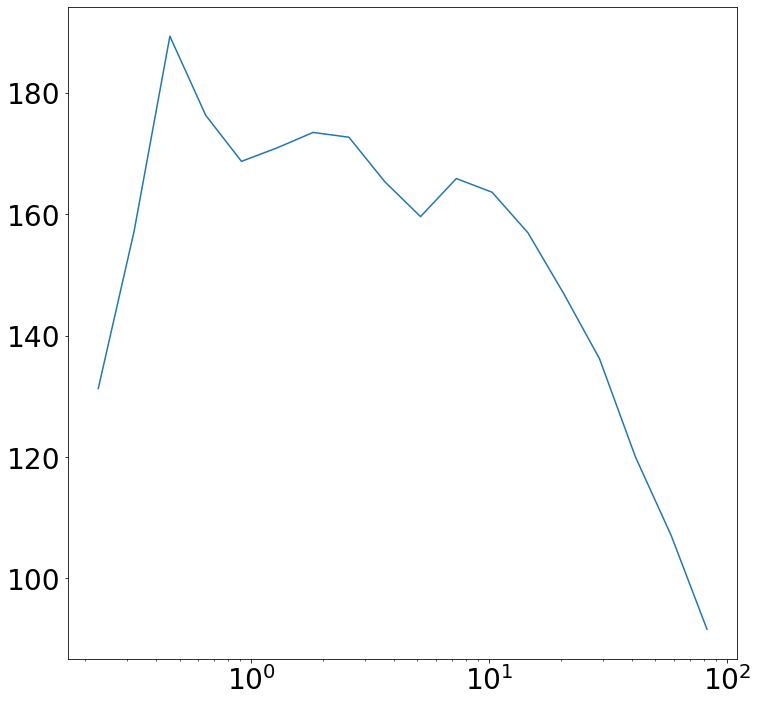

In [47]:
plt.figure(figsize=[12, 12])

plt.plot(rbins, vd)
#plt.yscale("log")
plt.xscale("log")
plt.show()